In [2]:
import pandas as pd

df = pd.read_csv('ETTh1.csv')

In [3]:
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [4]:
x = df.OT

In [5]:
x

,OT
0,30.531000
1,27.787001
2,27.787001
3,25.044001
4,21.948000
...,...
17415,10.904000
17416,11.044000
17417,10.271000
17418,9.778000


In [6]:
import matplotlib.pyplot as plt

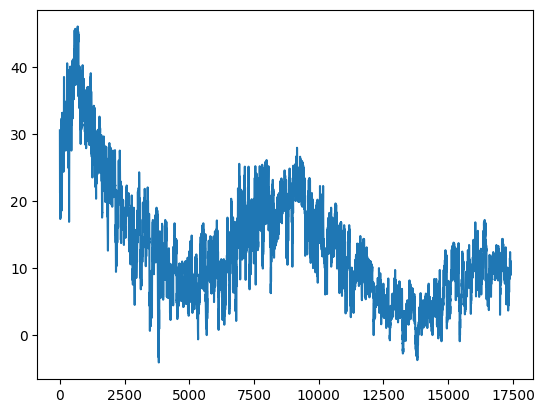

In [7]:
# Визуализация
plt.plot(x)

In [8]:
# Описание, оценка параметров

parts = int(len(x)/2)

# splitting the data into three parts
part_1, part_2 = x[0:parts], x[parts:]

# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2 = part_1.mean(), part_2.mean()

# calculating the variance of the separated
# three parts of data individually.
var_1, var_2 = part_1.var(), part_2.var()

In [9]:
print(mean_1, mean_2)

17.156005978553495 9.493337201209895


In [10]:
print(var_1, var_2)

83.65108815928753 33.780860063693936


In [11]:
print(x.mean(), x.var())

13.324671589881694 73.39256921637129


In [12]:
# Сезонность
import statsmodels.api as sm

In [13]:
result = sm.tsa.seasonal_decompose(df.OT, model='additive', period=5000)

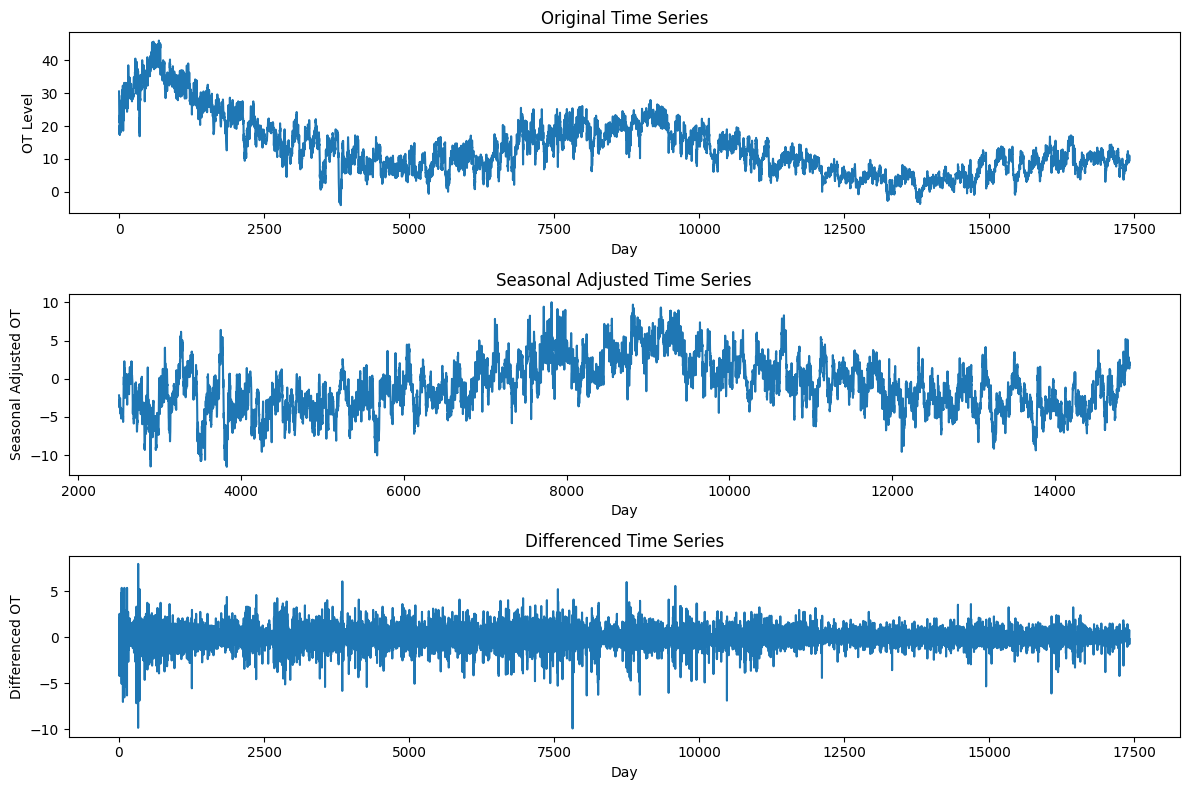

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.OT)
plt.title('Original Time Series')
plt.xlabel('Day')
plt.ylabel('OT Level')

# Seasonal Adjusted
plt.subplot(3, 1, 2)
plt.plot(result.resid)
plt.title('Seasonal Adjusted Time Series')
plt.xlabel('Day')
plt.ylabel('Seasonal Adjusted OT')

# Differenced
plt.subplot(3, 1, 3)
plt.plot(df.OT.diff())
plt.title('Differenced Time Series')
plt.xlabel('Day')
plt.ylabel('Differenced OT')

plt.tight_layout()
plt.show()

In [15]:
# скользящее среднее, MA

MA_OT = df.OT.rolling(1000).mean()

<Axes: >

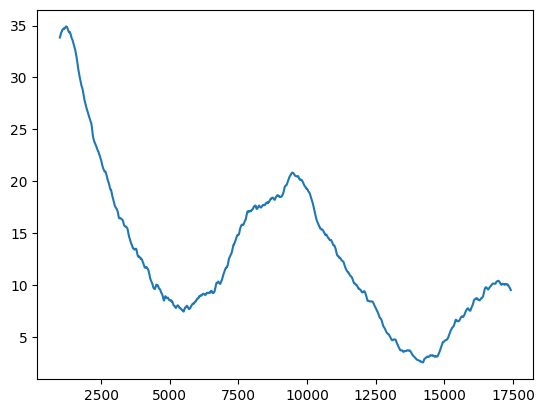

In [16]:
MA_OT.plot()

In [17]:
x_train = x[:100]
x_test = x[100:200]

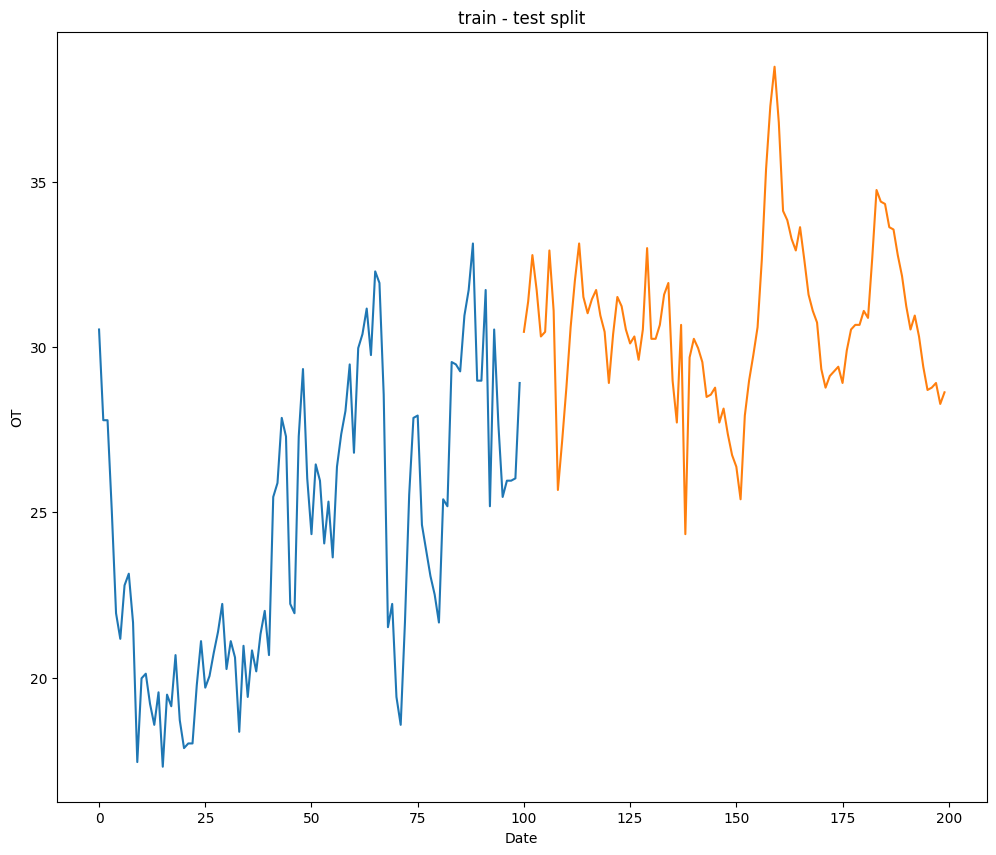

In [18]:
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
x_train.plot(ax=ax, figsize=(12,10))
x_test.plot(ax=ax)
plt.title('train - test split')
plt.xlabel('Date')
plt.ylabel('OT')
plt.show()

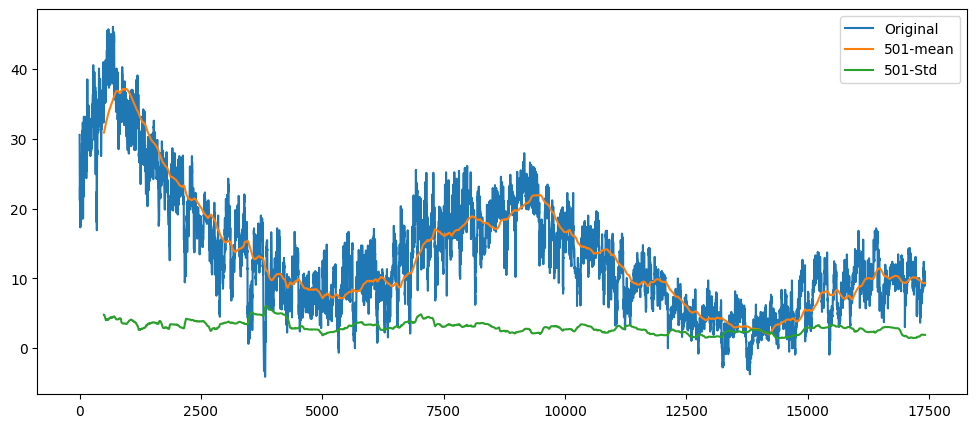

In [19]:
x = df.OT.plot(figsize=(12,5), legend= True, label='Original')
df.OT.rolling(window=501).mean().plot(legend= True, label='501-mean')
df.OT.rolling(window=501).std().plot(legend= True, label='501-Std')

ax.autoscale(axis='x',tight=True) # fit to x-axis
ylabel='OT'
xlabel = 'x'
ax.set(xlabel=xlabel, ylabel=ylabel) #name axis
plt.show()

In [20]:
# "Экспоненциальное сглаживание", предсказание

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_model = ExponentialSmoothing(x_train, trend='add', seasonal='add', seasonal_periods=21).fit()

In [22]:
test_predictions = exp_model.forecast(len(x_test))

<Axes: >

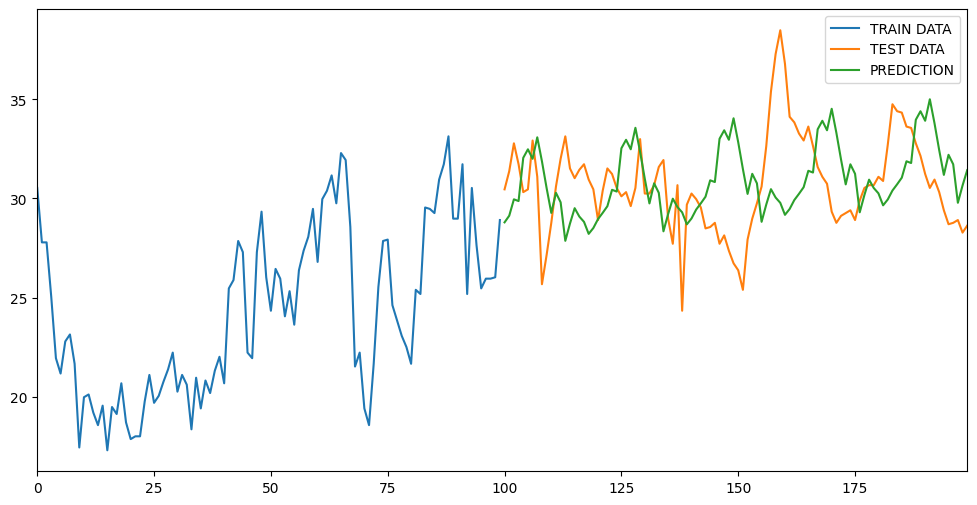

In [23]:
x_train.plot(legend=True, label='TRAIN DATA')
x_test.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

In [24]:
from statsmodels.tsa.ar_model import AutoReg

In [25]:
mod1 = AutoReg(x_train, 1, old_names=False)
res1 = mod1.fit()
print(res1.summary())

                            AutoReg Model Results                             
Dep. Variable:                     OT   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -219.003
Method:               Conditional MLE   S.D. of innovations              2.210
Date:                Wed, 30 Oct 2024   AIC                            444.005
Time:                        12:13:28   BIC                            451.791
Sample:                             1   HQIC                           447.155
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7749      1.305      2.892      0.004       1.217       6.333
OT.L1          0.8438      0.053     15.930      0.000       0.740       0.948
                                    Roots           

In [26]:
# предсказание
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions1 = res1.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [27]:
predictions1

,AR(1) Predictions
100,28.172896
101,27.548366
102,27.021362
103,26.576655
104,26.201393
...,...
195,24.173584
196,24.173584
197,24.173584
198,24.173584


<Axes: >

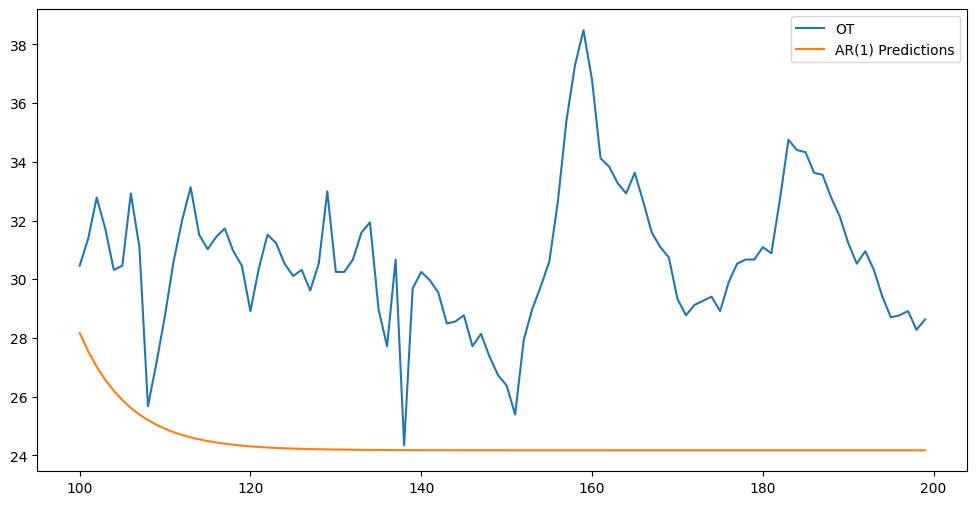

In [28]:
x_test.plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [29]:
# AR_501 predictions
mod5 = AutoReg(x_train, 5)
res5 = mod5.fit()
print(res5.summary())

                            AutoReg Model Results                             
Dep. Variable:                     OT   No. Observations:                  100
Model:                     AutoReg(5)   Log Likelihood                -209.881
Method:               Conditional MLE   S.D. of innovations              2.204
Date:                Wed, 30 Oct 2024   AIC                            433.761
Time:                        12:13:29   BIC                            451.638
Sample:                             5   HQIC                           440.985
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0366      1.493      2.034      0.042       0.111       5.962
OT.L1          0.7873      0.102      7.690      0.000       0.587       0.988
OT.L2          0.0718      0.131      0.550      0.5

In [30]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions5 = res5.predict(start=start, end=end, dynamic=False).rename('AR(5) Predictions')

<Axes: >

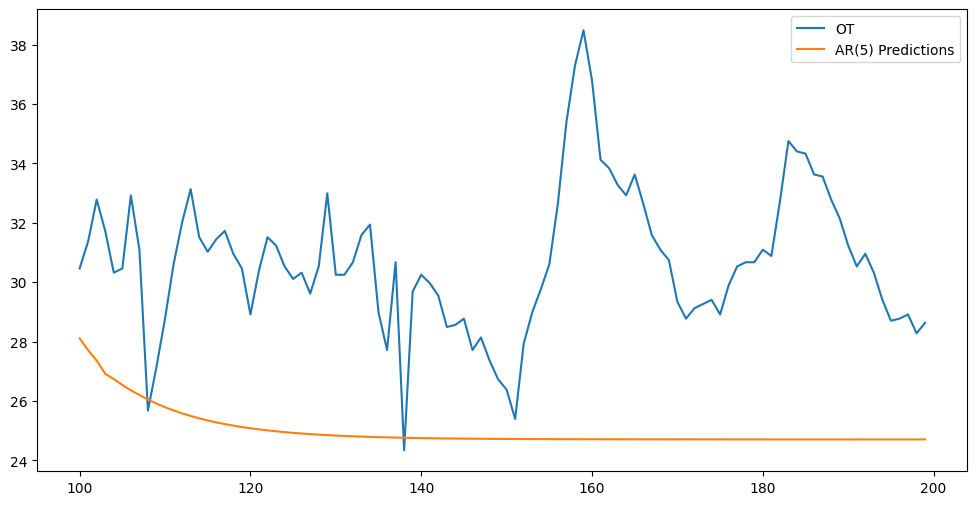

In [31]:
x_test.plot(legend=True)
predictions5.plot(legend=True,figsize=(12,6))

In [32]:
# предсказания будущих значений
start = len(x_train)
end = len(x_train)+10

pred_future = res5.predict(start=start, end=end, dynamic=False)

<Axes: >

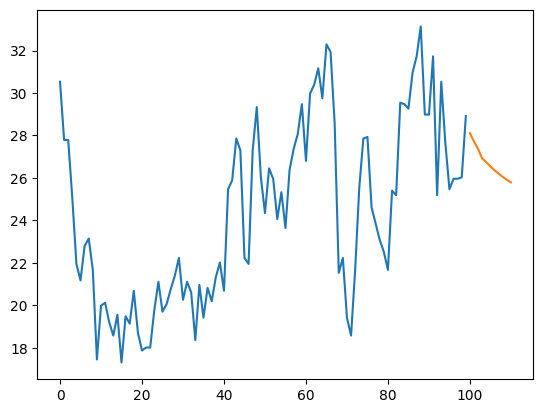

In [33]:
x_train.plot()
pred_future.plot()

In [34]:
x_train = df.OT[:10]
x_test = df.OT[10:20]

<Axes: >

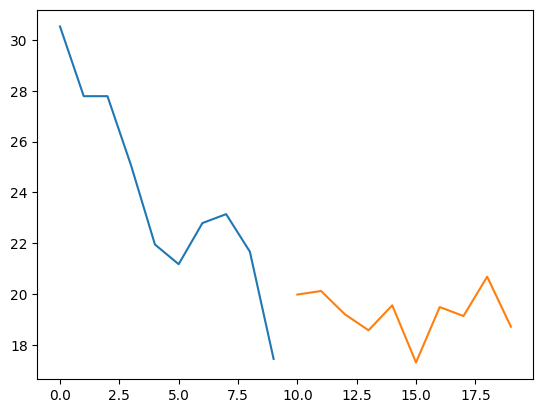

In [35]:
x_train.plot()
x_test.plot()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x_train,order=(3,0,0)).fit()

In [37]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions = model.predict(start=start, end=end).rename('ARMA(1,0,0) Predictions')

[Text(0.5, 0, 'x'), Text(0, 0.5, 'OT')]

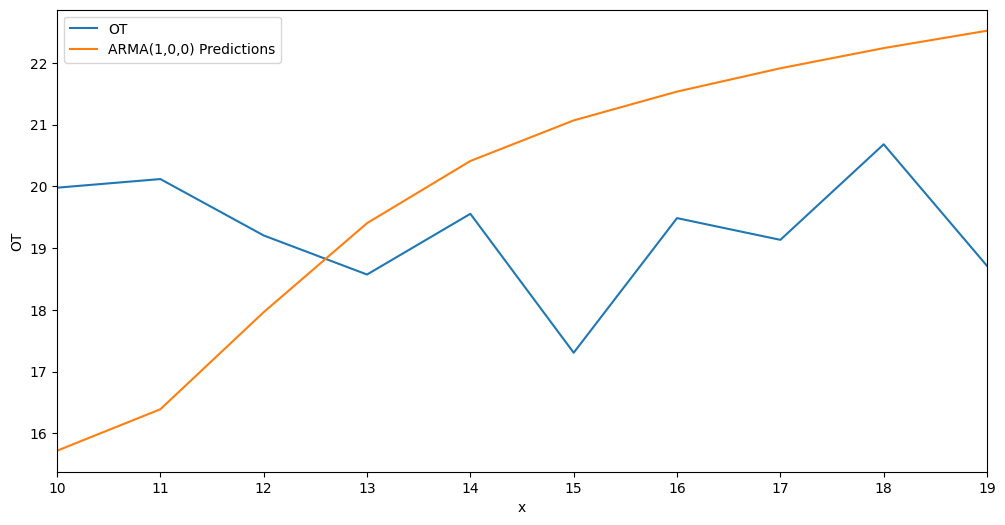

In [38]:
title = ''
ylabel='OT'
xlabel='x' # we don't really need a label here

ax = x_test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [39]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(x_test, predictions)
print(f'ARIMA(1,0,0) MSE Error: {error:11.10}')

ARIMA(1,0,0) MSE Error: 7.809707949


In [40]:
# Задание (файл 2)
# Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)
# Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
# Исследовать качество работы модели в зависимости от параметров (для групп 1-2).
# (1)Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Чтение данных
df = pd.read_csv('ETTm1.csv')
x = df.OT

# Параметры для задания
N = 2  # Количество групп
M = 150  # Количество данных для каждой группы

# Разделение данных на N групп
groups = [x[i * M:(i + 1) * M] for i in range(N)]

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Чтение данных
df = pd.read_csv('ETTm1.csv')
x = df.OT

# Параметры для задания
N = 2  # Количество групп
M = 150  # Количество данных для каждой группы

# Разделение данных на N групп
groups = [x[i * M:(i + 1) * M] for i in range(N)]

# Используем первую группу для обучения и вторую для тестирования
x_train = groups[0]
x_test = groups[1]

# Определяем наборы параметров для ARIMA
orders = [(1, 0, 0), (2, 0, 0), (3, 0, 0)]
results = {}

# Перебор параметров ARIMA
for order in orders:
    try:
        # Создаем и обучаем модель ARIMA на данных x_train
        model = ARIMA(x_train, order=order).fit()

        # Прогнозируем значения для второй группы (x_test)
        start = len(x_train)
        end = start + len(x_test) - 1
        predictions = model.predict(start=start, end=end)

        # Расчет ошибки MSE между предсказанными и фактическими данными x_test
        mse = mean_squared_error(x_test, predictions)
        results[order] = mse  # Сохраняем результат
        print(f'MSE для группы 2 на основе группы 1 с параметрами {order}: {mse:.5f}')

    except Exception as e:
        print(f'Ошибка для параметров {order}: {e}')

# Выводим результаты
print("\nРезультаты для всех параметров:")
for order, mse in results.items():
    print(f'Параметры {order} - MSE: {mse:.5f}')


MSE для группы 2 на основе группы 1 с параметрами (1, 0, 0): 33.81899
MSE для группы 2 на основе группы 1 с параметрами (2, 0, 0): 33.54492
MSE для группы 2 на основе группы 1 с параметрами (3, 0, 0): 33.33469

Результаты для всех параметров:
Параметры (1, 0, 0) - MSE: 33.81899
Параметры (2, 0, 0) - MSE: 33.54492
Параметры (3, 0, 0) - MSE: 33.33469


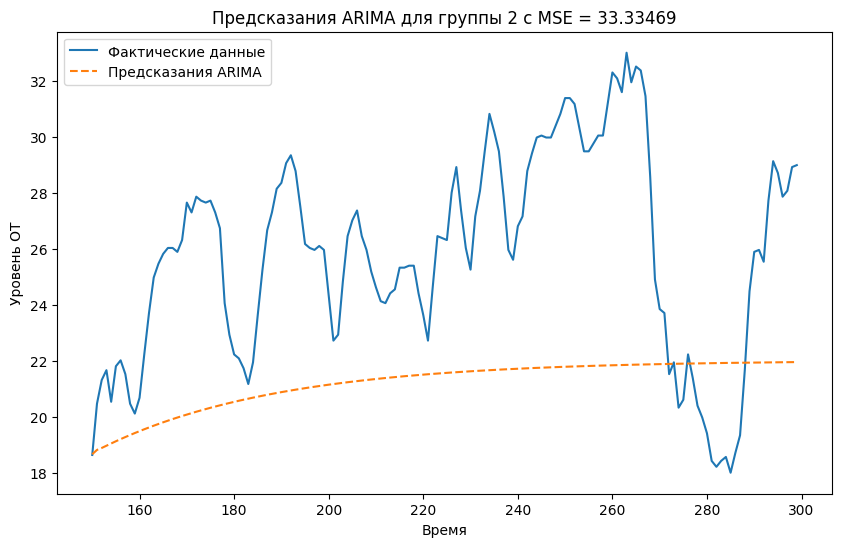

In [60]:
# Визуализация предсказаний и тестовых данных
plt.figure(figsize=(10, 6))
plt.plot(x_test.index, x_test, label='Фактические данные')
plt.plot(x_test.index, predictions, label='Предсказания ARIMA', linestyle='--')
plt.title(f'Предсказания ARIMA для группы 2 с MSE = {mse:.5f}')
plt.xlabel('Время')
plt.ylabel('Уровень OT')
plt.legend()
plt.show()


Итеративное MSE с экспоненциальным средним: 1.98476


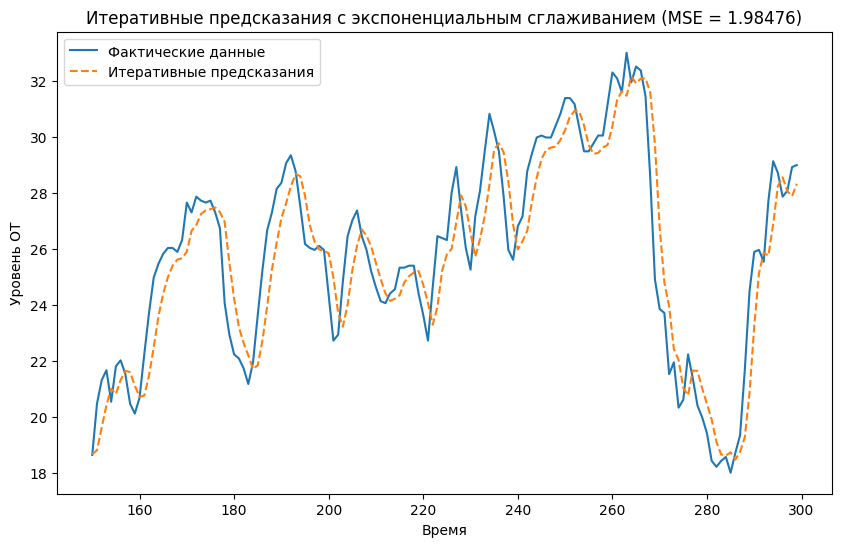

In [61]:
alpha = 0.5  # Коэффициент для экспоненциального сглаживания
smoothed_data = x_train.copy()

iterative_predictions = []

# Итеративное предсказание с обновлением данных через экспоненциальное среднее
for i in range(len(x_test)):
    # Обучение модели на сглаженных данных
    model = ARIMA(smoothed_data, order=order).fit()

    # Прогнозирование следующего значения и извлечение значения
    next_pred = model.forecast().iloc[0]  # Либо model.forecast().values[0]
    iterative_predictions.append(next_pred)

    # Обновление данных экспоненциальным средним
    actual = x_test.iloc[i]
    smoothed_data = pd.concat([smoothed_data, pd.Series([alpha * actual + (1 - alpha) * next_pred])], ignore_index=True)

# Расчет MSE для итеративного предсказания
iterative_mse = mean_squared_error(x_test, iterative_predictions)
print(f'Итеративное MSE с экспоненциальным средним: {iterative_mse:.5f}')

# Визуализация итеративного предсказания
plt.figure(figsize=(10, 6))
plt.plot(x_test.index, x_test, label='Фактические данные')
plt.plot(x_test.index, iterative_predictions, label='Итеративные предсказания', linestyle='--')
plt.title(f'Итеративные предсказания с экспоненциальным сглаживанием (MSE = {iterative_mse:.5f})')
plt.xlabel('Время')
plt.ylabel('Уровень OT')
plt.legend()
plt.show()
